<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

## 1 Random numbers from other distributions

### 1.1 Random numbers from the Normal distribution

In [1]:
np.random.normal(loc=5, scale=2, size=10)

array([2.16053657, 0.16823683, 5.9642595 , 6.06852963, 6.65521916,
       2.53586653, 3.97304447, 2.42204278, 5.21529664, 8.97974698])

### 1.2 Visualising the random numbers

Text(0, 0.5, 'Value of random number')

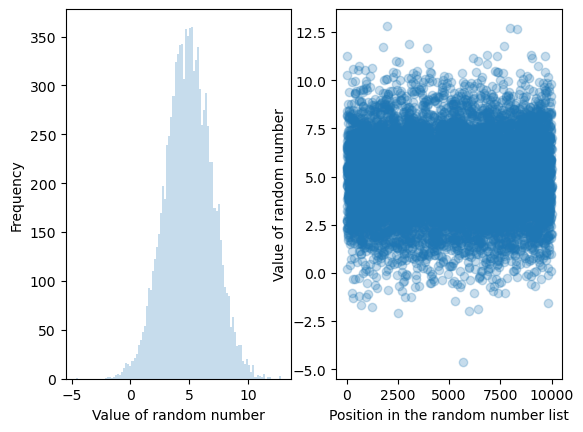

In [15]:
import numpy as np
from matplotlib import pyplot as plt
n = 1_000_0
random_numbers = np.random.normal(loc=5, scale=2, size=n) # mean is loc and scale is sd, size is no of numbers used in the simulation

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.3 68%?

In [16]:
n = 10_000
mean, sd = 5, 2 # one s.d. from the normal is .68
random_numbers = np.random.normal(loc=mean, scale=sd, size=n)

mask = (random_numbers >= mean - sd) & (random_numbers <= mean + sd)

print(f'% of points between 1 std.dev. from the mean: {np.sum(mask)/n*100:.2f}%')

% of points between 1 std.dev. from the mean: 67.81%


## 1 Brownian Motion in 1D

### 1.1 The scenario

In [17]:
def brown_1d(prob_right=.5, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   # Go right?
            x += step_size
        else:
            x -= step_size

    return x

In [18]:
import numpy.random as rnd

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.5')

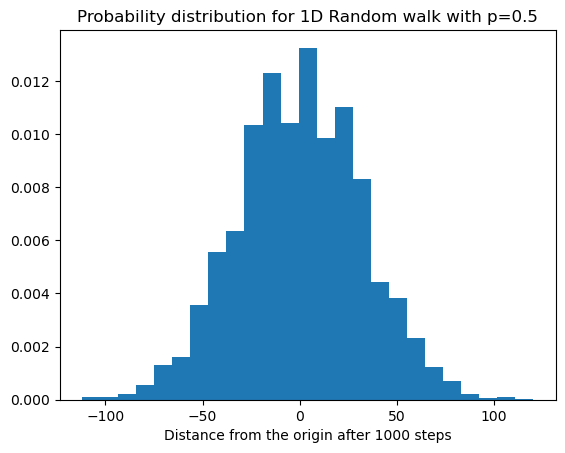

In [20]:
no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.6')

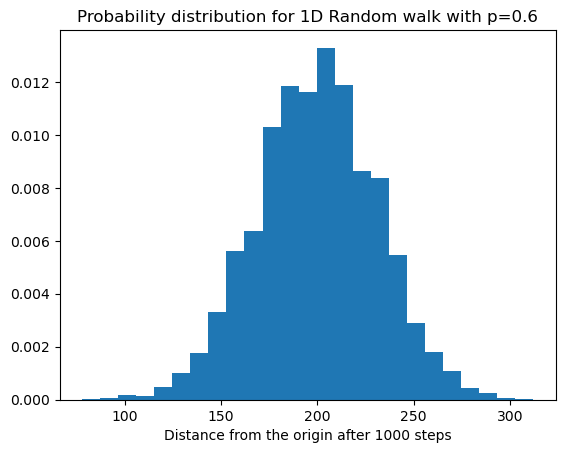

In [21]:
no_of_steps, p = 1_000, .6 # changed to 0.6
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps) 
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True) # density=true normalises the area under the curve to 1 
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

### 1.2 The simulation

In [22]:
def normal(x, m=0, s=1):
    '''
    Probability density function for the
    Gaussian distribution.
    '''
    s2 = s**2
    output = np.exp(-(x-m)**2/(2*s2))
    output /= np.sqrt(2*np.pi*s2)
    return output

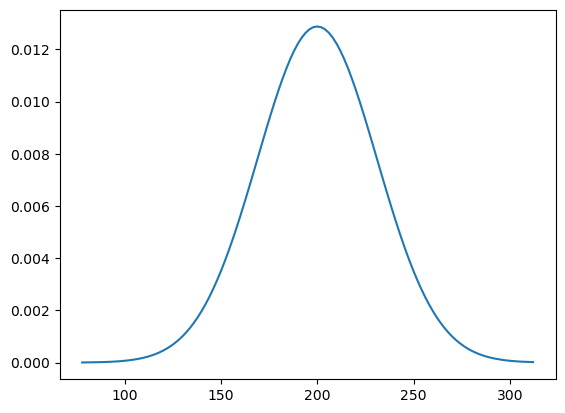

In [48]:
prob_right= p
prob_left = 1 - prob_right # q = 1 -p
mean = no_of_steps * (prob_right - prob_left)    # mean = N(p - q)
sd = np.sqrt(4*no_of_steps*prob_right*prob_left) # sd = sqrt(4 N p q)
x = np.unique(results)                           # Numbers that form 
                                                 # the x-axis
plt.plot(x, normal(x, mean, sd), label='Theoretical')

### 1.3 What does theory say?

In [ ]:

# Your code here


## 2 Estimating \(\pi\)

### 2.1 The method

In [ ]:

# Your code here


### 2.2 A poor but intuitive solution

In [24]:
N_total = 100_000                             # Yes, Python allows the _ : same thing as 100000
N_green = 0

for _ in range(N_total):
    x = rnd.uniform(low=-1, high=1, size=1)  # probabilites of numbers btwn 1 and -1 so only taking the first quadrant    
    y = rnd.uniform(low=-1, high=1, size=1)
    r = np.sqrt(x**2 + y**2)                   # eqn : (x^2 + y^2)^2 = r

    if r <= 1:
        N_green += 1                           # In or out of the circle

4 * N_green / N_total                          # multiply by 4 for the whole circle 

3.14352

### 2.3 A better solution

In [25]:
N_total=1_000_000
x=rnd.uniform(low=-1, high=1, size=N_total) # exact same thing :) just uniform distribution
y=rnd.uniform(low=-1, high=1, size=N_total)
N_green= np.sum((x**2+y**2) <= 1)               

4 * (N_green / N_total) 


3.144276

### 2.4 A smarter solution

In [26]:
N_total=1_000_000
x=rnd.rand(N_total)  # same thing just random distribution 
y=rnd.rand(N_total)
N_green=np.sum((x**2+y**2) <= 1)

4 * (N_green / N_total)


3.143088

## Exercise 1 :  Vital Stats of Random π

In [32]:
def estimate_pi(n): 
    x=rnd.rand(n)
    y=rnd.rand(n)
    N_green=np.sum((x**2+y**2) <= 1)
    return 4 * (N_green / n)


In [35]:
y=[]
yerror=[]
cow =[]
estimate_pi(n=10000)
jill = np.array([10,100,1000,10000,100000,1000000])
for number in jill: 
    for count in range (100): 
        cow.append(estimate_pi(number)) 
    what = np.array(cow)
    y.append(np.mean(what))
    yerror.append(np.std(what))
    cow.clear()
print(y)
print(yerror)

[3.1720000000000006, 3.1615999999999995, 3.14076, 3.1408119999999995, 3.1411695999999996, 3.1415500800000005]
[0.5161550154750025, 0.16481941633193584, 0.045962402026003844, 0.015165165874463744, 0.005101918447015783, 0.0016041738040499212]


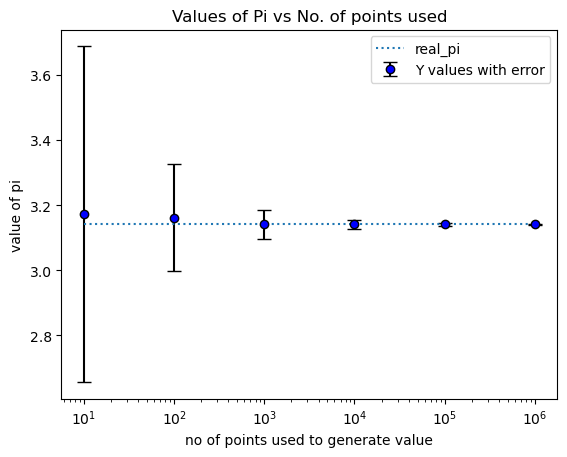

In [46]:

plt.style.use('default')
plt.errorbar(jill, np.array(y), yerr= np.array(yerror),
             color= 'black', linestyle= 'none',
             marker='o', markerfacecolor= 'blue',
             ecolor= 'black',capsize=5,
             label= 'Y values with error')

plt.plot(jill,np.array([np.pi]*6),linestyle='dotted',label='real_pi')
plt.xscale('log')
plt.xlabel('no of points used to generate value')
plt.ylabel('value of pi')
plt.title('Values of Pi vs No. of points used')
plt.legend(loc = 'upper right')
plt.show(block=False)
